In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import mahalanobis

In [4]:
np.random.seed(2024)

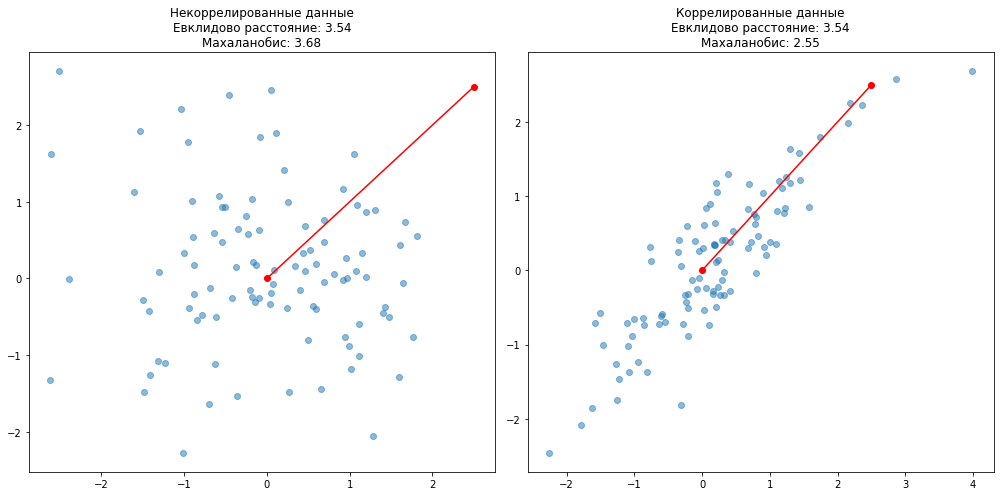

(3.5355339059327378, 3.6822797374862963, 3.5355339059327378, 2.552939788558229)

In [5]:
# набор данных без корреляции между признаками
data_uncorrelated = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)

# набор данных с корреляцией между признаками
data_correlated = np.random.multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]], 100)

# sыбор двух точек в каждом наборе данных
point1_uncorrelated = np.array([0, 0])
point2_uncorrelated = np.array([2.5, 2.5])

point1_correlated = np.array([0, 0])
point2_correlated = np.array([2.5, 2.5])


euclidean_distance_uncorrelated = np.linalg.norm(point1_uncorrelated - point2_uncorrelated)
euclidean_distance_correlated = np.linalg.norm(point1_correlated - point2_correlated)

mahalanobis_distance_uncorrelated = mahalanobis(point1_uncorrelated, point2_uncorrelated, np.linalg.inv(np.cov(data_uncorrelated.T)))
mahalanobis_distance_correlated = mahalanobis(point1_correlated, point2_correlated, np.linalg.inv(np.cov(data_correlated.T)))

# график
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# некоррелированные данные
axs[0].scatter(data_uncorrelated[:,0], data_uncorrelated[:,1], alpha=0.5)
axs[0].plot([point1_uncorrelated[0], point2_uncorrelated[0]], [point1_uncorrelated[1], point2_uncorrelated[1]], 'ro-')
axs[0].set_title(f'Некоррелированные данные\nЕвклидово расстояние: {euclidean_distance_uncorrelated:.2f}\nМахаланобис: {mahalanobis_distance_uncorrelated:.2f}')

# коррелированные данные
axs[1].scatter(data_correlated[:,0], data_correlated[:,1], alpha=0.5)
axs[1].plot([point1_correlated[0], point2_correlated[0]], [point1_correlated[1], point2_correlated[1]], 'ro-')
axs[1].set_title(f'Коррелированные данные\nЕвклидово расстояние: {euclidean_distance_correlated:.2f}\nМахаланобис: {mahalanobis_distance_correlated:.2f}')

plt.tight_layout()
plt.show()